### Kernel Functions

Kernel functions determine the properties of the covariance matrices of GPs. I'll discuss the **Radial Basis Functions (RBF)**, and the squared exponential function in particular, in some detail, define numerous commonly used kernel functions, and show samples drawn from GP priors which use some of the more interesting ones.

#### Radial Basis Functions

Radial basis functions are any functions $\phi(\boldsymbol{x})$ such that $\phi(\boldsymbol{x}) = \phi(\lVert\boldsymbol{x}\rVert)$, ie. the functions which depend on some distance metric. Such functions are often given in terms of $r = \lVert\boldsymbol{x} - \boldsymbol{x_i}\rVert$, or the distance between two points. The most common distance metric is the Euclidean, or $\ell_2$ distance. These make very useful kernels, as they can be used to create smooth functions.

An example is the squared exponential kernel:

$$
\begin{equation}
k(x, x') = \sigma^2\exp\left({-\frac{r^2}{2\ell^2}}\right)
\end{equation}
$$
with parameters output variance $\sigma^2$ and lengthscale $\ell$.

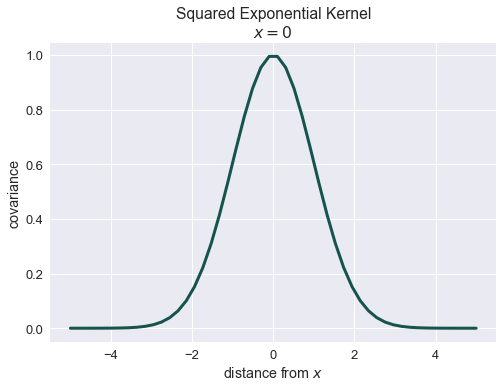

In [1]:
from dillinger import gaussian_process
from dillinger import kernel_functions

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(font_scale=1.3)
sns.set_palette('cubehelix', 3)

x = np.linspace(-5, 5, 50)
y = kernel_functions.sq_exp_kernel(0, x)
plt.plot(x, y, linewidth=3)
plt.title('Squared Exponential Kernel\n$x=0$')
plt.ylabel('covariance')
plt.xlabel('distance from $x$');

The above plot illustrates the behavior of the squared exponential kernel: points near one another are highly correlated, while more distant points are not. This leads to very smooth functions.

Another example is the rational quadratic kernel, which is equivalent to summing squared exponential kernels of varying lengthscales:

$$
\begin{equation}
k(x, x') = \sigma^2\left({1 + \frac{r^2}{2\alpha\ell^2}}\right)^{-\alpha}
\end{equation}
$$

with $\alpha$ determining the weighting of differently scaled variations.

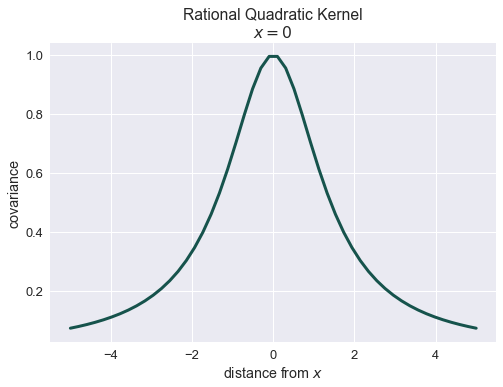

In [2]:
y = kernel_functions.rational_quadratic_kernel(0, x)
plt.plot(x, y, linewidth=3)
plt.title('Rational Quadratic Kernel\n$x=0$')
plt.ylabel('covariance')
plt.xlabel('distance from $x$');

With some idea of how kernel functions operate, I'll define a few more and show samples drawn from them.

#### Samples from GPs with various kernel functions

##### Squared Exponential

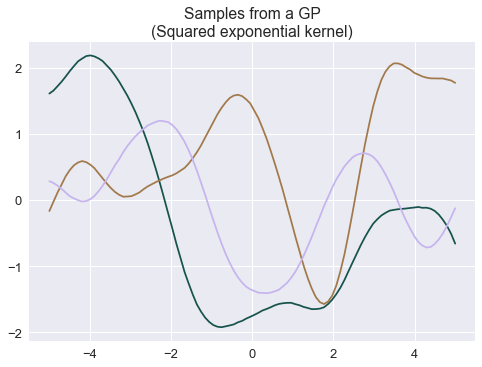

In [3]:
x = np.linspace(-5, 5, 100)
x.shape = -1, 1
GP = gaussian_process.GaussianProcess(x, noise=.1, kernel_function='sq_exp')
samples = GP.sample(3)
for sample in samples:
    plt.plot(x, sample)
plt.title('Samples from a GP\n(Squared exponential kernel)');

##### Rational Quadratic

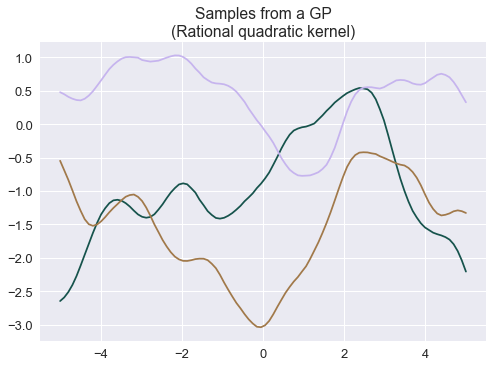

In [4]:
GP = gaussian_process.GaussianProcess(x, noise=.1, kernel_function='rational_quadratic')
samples = GP.sample(3)
for sample in samples:
    plt.plot(x, sample)
plt.title('Samples from a GP\n(Rational quadratic kernel)');

##### Periodic: samples periodic functions

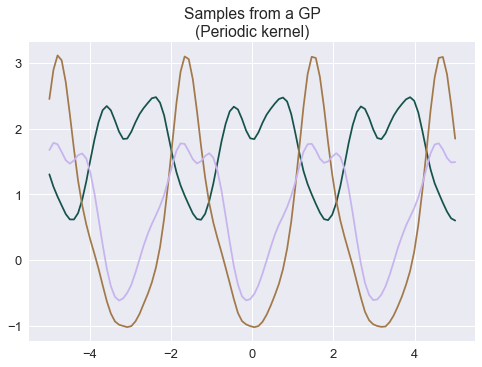

In [5]:
GP = gaussian_process.GaussianProcess(x, noise=.1, kernel_function='periodic', kernel_args={'ell': 1, 'p': np.pi, 'sigma': 1.1})
samples = GP.sample(3)
for sample in samples:
    plt.plot(x, sample)
plt.title('Samples from a GP\n(Periodic kernel)');

##### Symmetric: samples symmetric functions

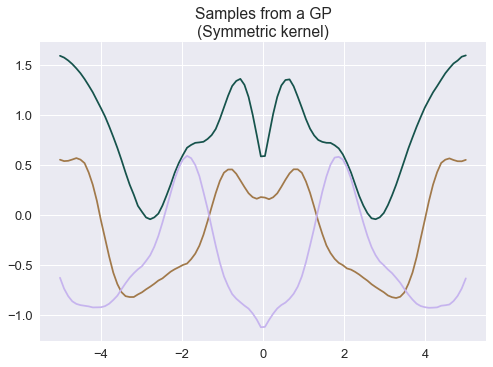

In [6]:
GP = gaussian_process.GaussianProcess(x, noise=.1, kernel_function='symmetric')
samples = GP.sample(3)
for sample in samples:
    plt.plot(x, sample)
plt.title('Samples from a GP\n(Symmetric kernel)');

##### Brownian: samples random walks

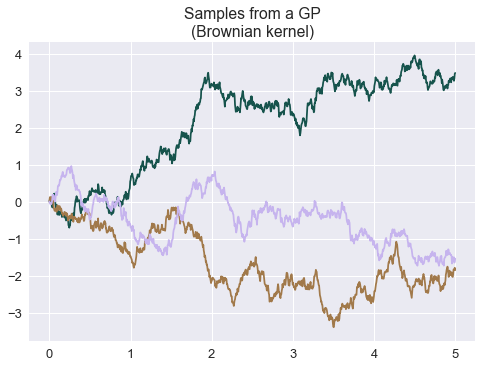

In [7]:
x = np.linspace(0, 5, 1000)
x.shape = -1, 1

GP = gaussian_process.GaussianProcess(x, noise=.1, kernel_function='brownian')
samples = GP.sample(3)
for sample in samples:
    plt.plot(x, sample)
plt.title('Samples from a GP\n(Brownian kernel)');

##### Ornstein-Uhlenbeck: samples mean-reverting random walks

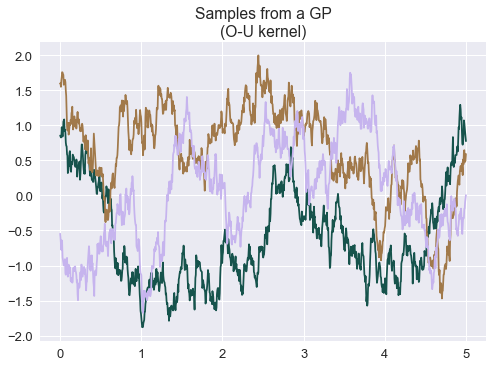

In [8]:
GP = gaussian_process.GaussianProcess(x, noise=.1, kernel_function='ornstein_uhlenbeck')
samples = GP.sample(3)
for sample in samples:
    plt.plot(x, sample)
plt.title('Samples from a GP\n(O-U kernel)');